In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack


In [2]:
# 2. Load and inspect the dataset
df = pd.read_csv("/zomato.csv", encoding='latin-1')
df = df[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating', 'Votes']]
df.dropna(subset=['Cuisines'], inplace=True)
df.fillna(0, inplace=True)


In [3]:
# Vectorize the Cuisines column
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
cuisine_features = vectorizer.fit_transform(df['Cuisines'])


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [4]:
#4. Scale numerical features
numerical = df[['Average Cost for two', 'Aggregate rating', 'Votes']]
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical)


In [5]:
# 5. Combine all features
X = hstack([cuisine_features, numerical_scaled])


In [6]:
#6. Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


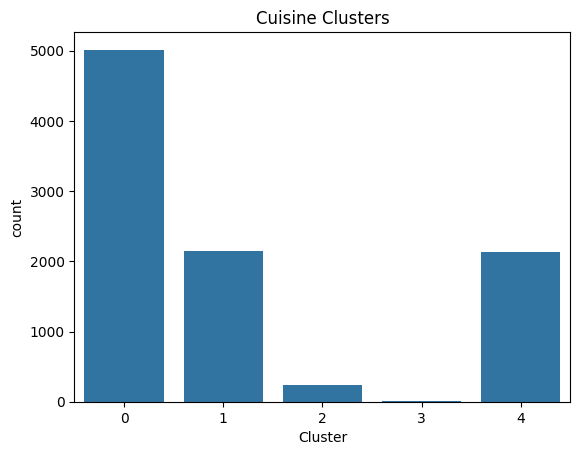

In [7]:
#7. Visualize the Clusters
sns.countplot(x='Cluster', data=df)
plt.title("Cuisine Clusters")
plt.show()


In [8]:
#8. Recommendation Function
def recommend_cuisines(cuisine_name):
    sample = df[df['Cuisines'].str.contains(cuisine_name, na=False)]
    if sample.empty:
        return "Cuisine not found!"
    cluster = sample['Cluster'].iloc[0]
    recommendations = df[(df['Cluster'] == cluster) & (~df['Cuisines'].str.contains(cuisine_name))]
    return recommendations[['Restaurant Name', 'Cuisines', 'Aggregate rating']].sort_values(by='Aggregate rating', ascending=False).head(10)
